In [56]:
install.packages("pre")

Installing package into 'C:/Users/Nikhil/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'pre' is in use and will not be installed"

In [83]:
getwd()

[1] "C:/Users/Nikhil"

In [84]:
climate<-read.csv("climate_change.csv")
str(climate)

'data.frame':	308 obs. of  11 variables:
 $ Year    : int  1983 1983 1983 1983 1983 1983 1983 1983 1984 1984 ...
 $ Month   : int  5 6 7 8 9 10 11 12 1 2 ...
 $ MEI     : num  2.556 2.167 1.741 1.13 0.428 ...
 $ CO2     : num  346 346 344 342 340 ...
 $ CH4     : num  1639 1634 1633 1631 1648 ...
 $ N2O     : num  304 304 304 304 304 ...
 $ CFC.11  : num  191 192 193 194 194 ...
 $ CFC.12  : num  350 352 354 356 357 ...
 $ TSI     : num  1366 1366 1366 1366 1366 ...
 $ Aerosols: num  0.0863 0.0794 0.0731 0.0673 0.0619 0.0569 0.0524 0.0486 0.0451 0.0416 ...
 $ Temp    : num  0.109 0.118 0.137 0.176 0.149 0.093 0.232 0.078 0.089 0.013 ...


In [ ]:
summary(climate)
dim(climate)

In [87]:
library("pre")
airq <- climate[complete.cases(climate), ]
colnames(airq)

[1] "Year"     "Month"    "MEI"      "CO2"      "CH4"      "N2O"     
 [7] "CFC.11"   "CFC.12"   "TSI"      "Aerosols" "Temp"

In [88]:
set.seed(42)
airq.ens <- pre(Temp ~ ., data = airq)

In [89]:
summary(airq.ens)


Final ensemble with cv error within 1se of minimum: 
  lambda =  0.004080545
  number of terms = 32
  mean cv error (se) = 0.006814214 (0.0009474361)

  cv error type : Mean-Squared Error



In [90]:
airq.ens


Final ensemble with cv error within 1se of minimum: 
  lambda =  0.004080545
  number of terms = 32
  mean cv error (se) = 0.006814214 (0.0009474361)

  cv error type : Mean-Squared Error

         rule    coefficient
  (Intercept)   2.529473e-01
      rule558  -5.242086e-02
      rule319   4.050668e-02
      rule604  -3.660975e-02
       rule92  -3.157222e-02
      rule411   2.973414e-02
      rule136  -2.779489e-02
      rule421   2.567463e-02
      rule144   2.279572e-02
      rule516   2.232827e-02
      rule437  -1.950549e-02
      rule413   1.926903e-02
      rule294   1.532984e-02
      rule485   1.532090e-02
      rule541  -1.347435e-02
      rule530  -1.263472e-02
      rule539   1.124016e-02
      rule118  -1.061121e-02
      rule370  -1.029310e-02
      rule487  -9.772050e-03
      rule697  -9.718697e-03
      rule477   9.666698e-03
       rule29   8.506874e-03
      rule269   5.252536e-03
      rule663  -4.697086e-03
      rule673   3.961112e-03
       rule12  -3.583642e-0

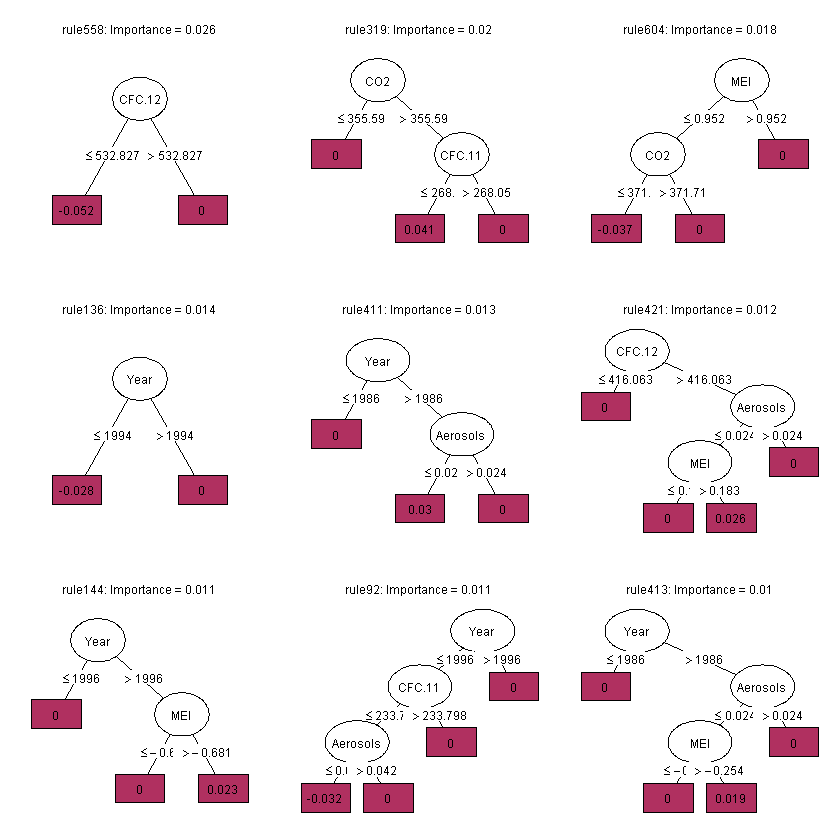

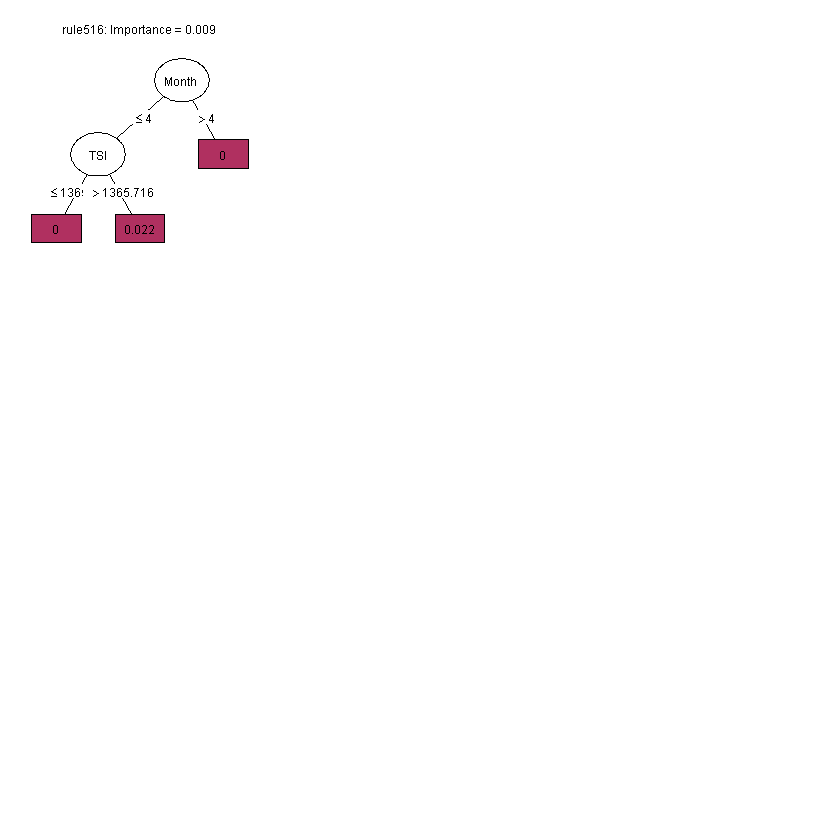

In [93]:
plot(airq.ens, nterms = 20, cex = 0.5,fill = "maroon")

In [94]:
coefs <- coef(airq.ens)
coefs[1:6, ]

,rule,coefficient,description
653,(Intercept),0.25294726,1
513,rule558,-0.05242086,CFC.12 <= 532.827
298,rule319,0.04050668,CO2 > 355.59 & CFC.11 <= 268.05
556,rule604,-0.03660975,MEI <= 0.952 & CO2 <= 371.71
87,rule92,-0.03157222,Year <= 1996 & CFC.11 <= 233.798 & Aerosols <= 0.0416
379,rule411,0.02973414,Year > 1986 & Aerosols <= 0.0238


In [95]:
predict(airq.ens, newdata = airq[1:6, ])

1          2          3          4          5          6 
0.11108768 0.11108768 0.11108768 0.13059317 0.05863209 0.05863209

In [96]:
set.seed(43)
airq.cv <- cvpre(airq.ens)

$MSE
         MSE           se 
0.0075802017 0.0007750083 

$MAE
        MAE          se 
0.066576325 0.003202093 



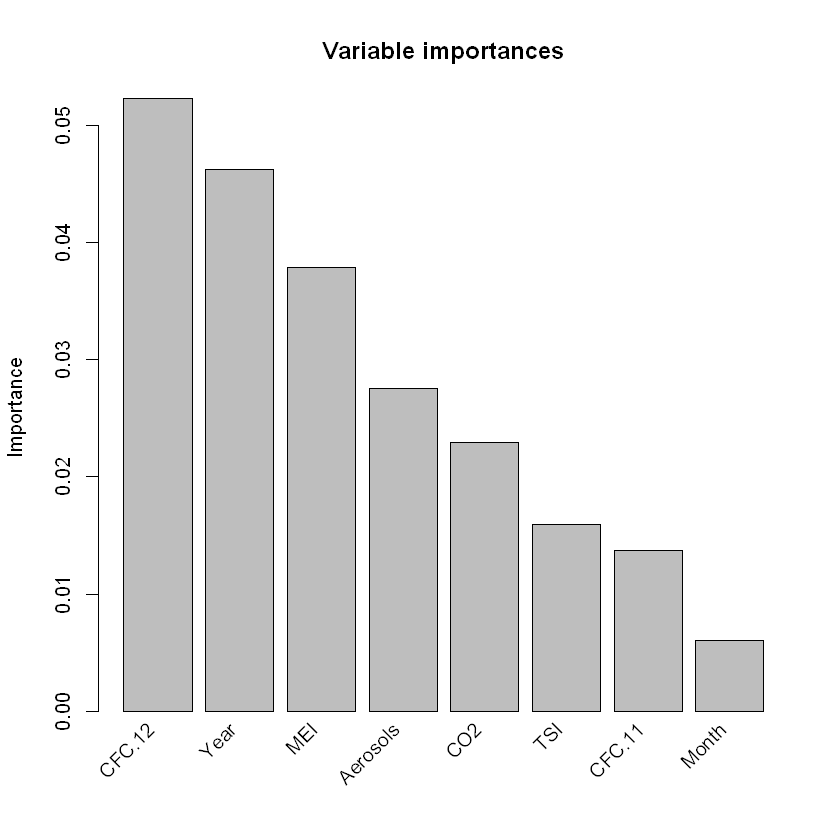

In [97]:
imps <- importance(airq.ens, round = 4)

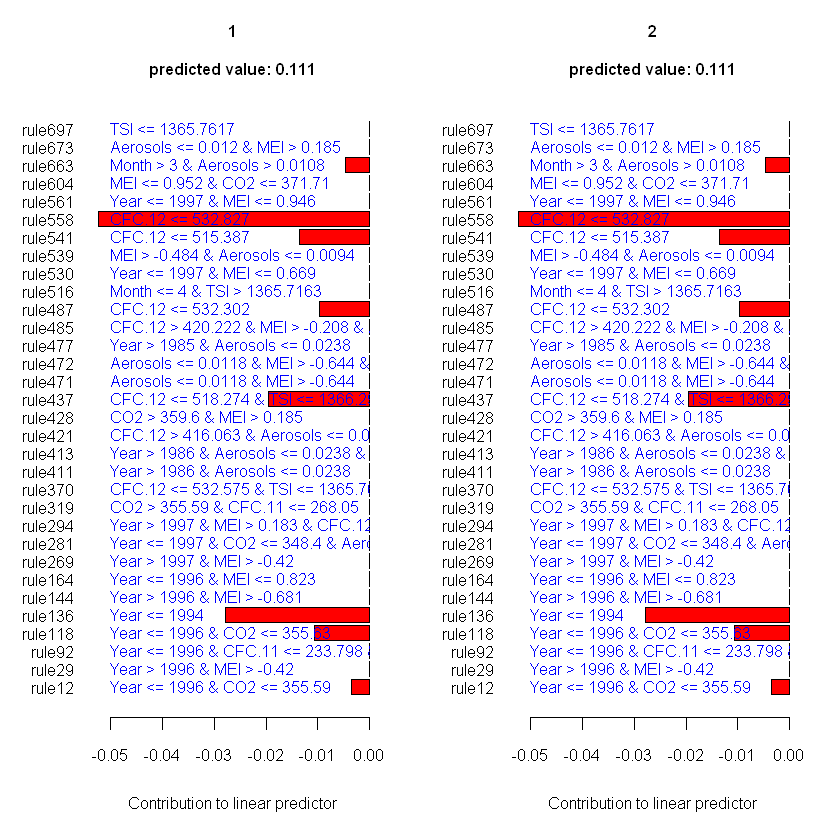

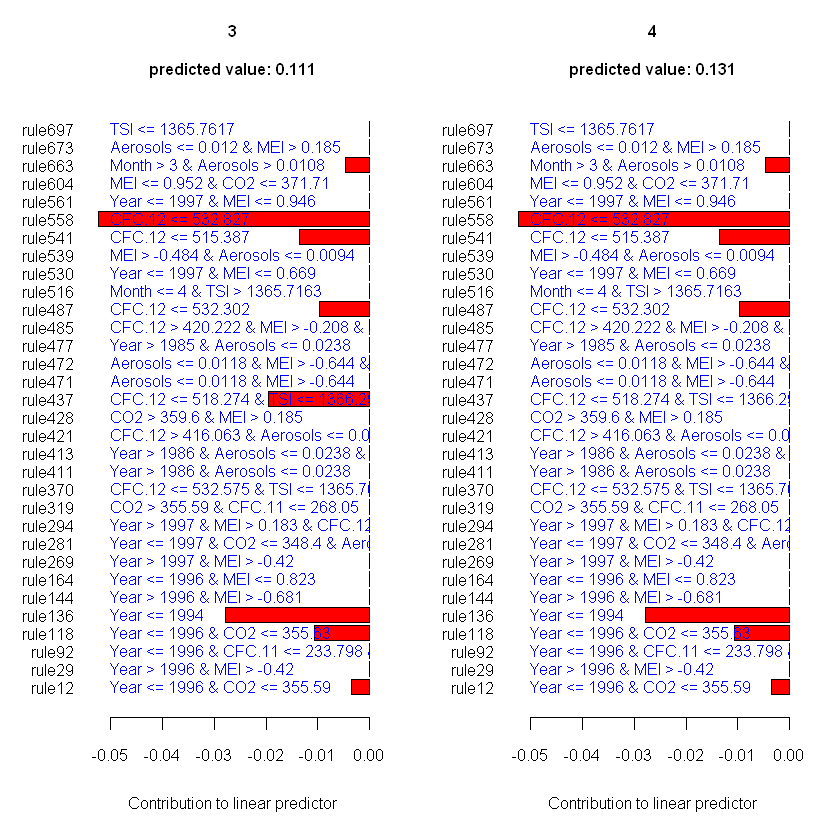

In [100]:
par(mfrow = c(1, 2))
expl <- explain(airq.ens, newdata = airq[1:4, ], cex = .8,bar.col = c("red", "green"),rule.col = "blue")

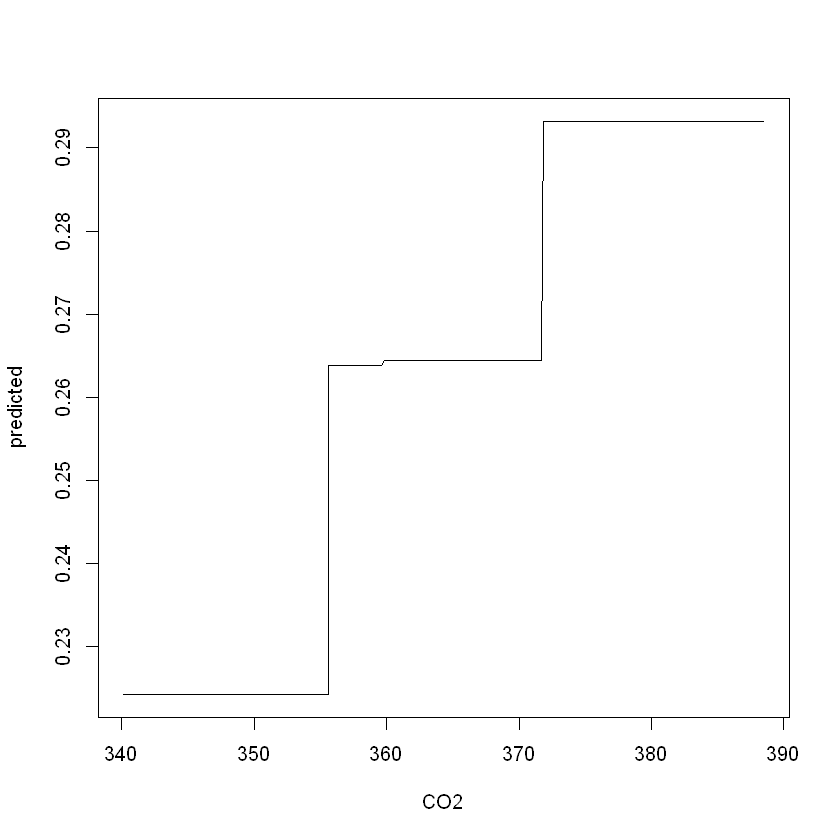

In [102]:
singleplot(airq.ens, varname = "CO2")

Installing package into 'C:/Users/Nikhil/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'akima' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'akima'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Nikhil\Documents\R\win-library\3.6\00LOCK\akima\libs\x64\akima.dll to C:\Users\Nikhil\Documents\R\win-library\3.6\akima\libs\x64\akima.dll: Permission denied"Warning message:
"restored 'akima'"


The downloaded binary packages are in
	C:\Users\Nikhil\AppData\Local\Temp\Rtmp2TEnDJ\downloaded_packages


NOTE: function pairplot uses package 'akima', which has an ACM license. See also https://www.acm.org/publications/policies/software-copyright-notice.


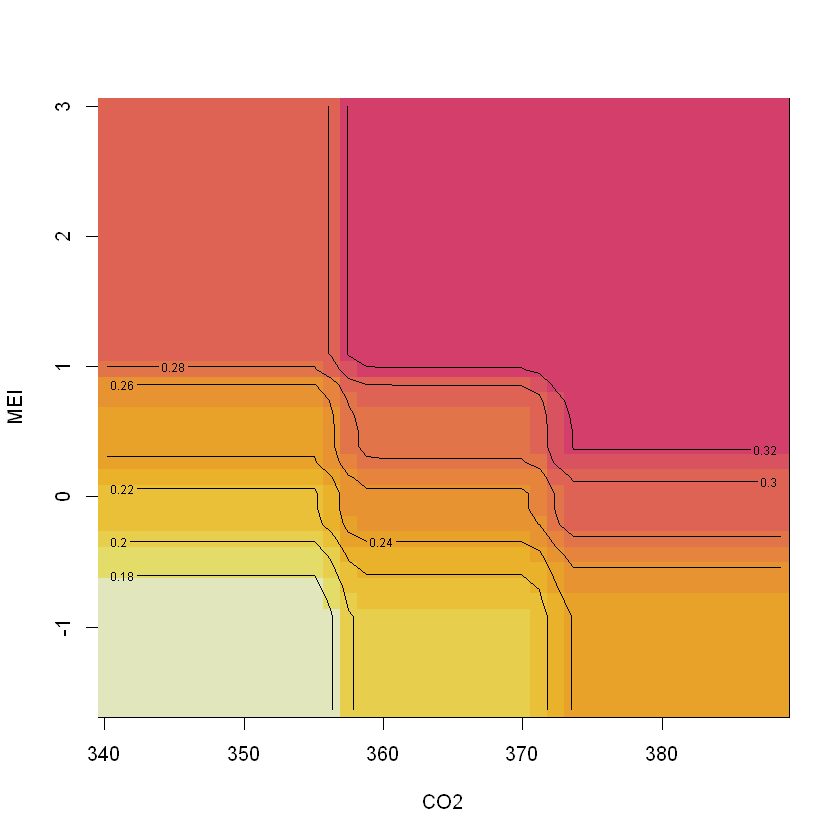

In [103]:
install.packages("akima")
pairplot(airq.ens, varnames = c("CO2", "MEI"))

NOTE: function pairplot uses package 'akima', which has an ACM license. See also https://www.acm.org/publications/policies/software-copyright-notice.


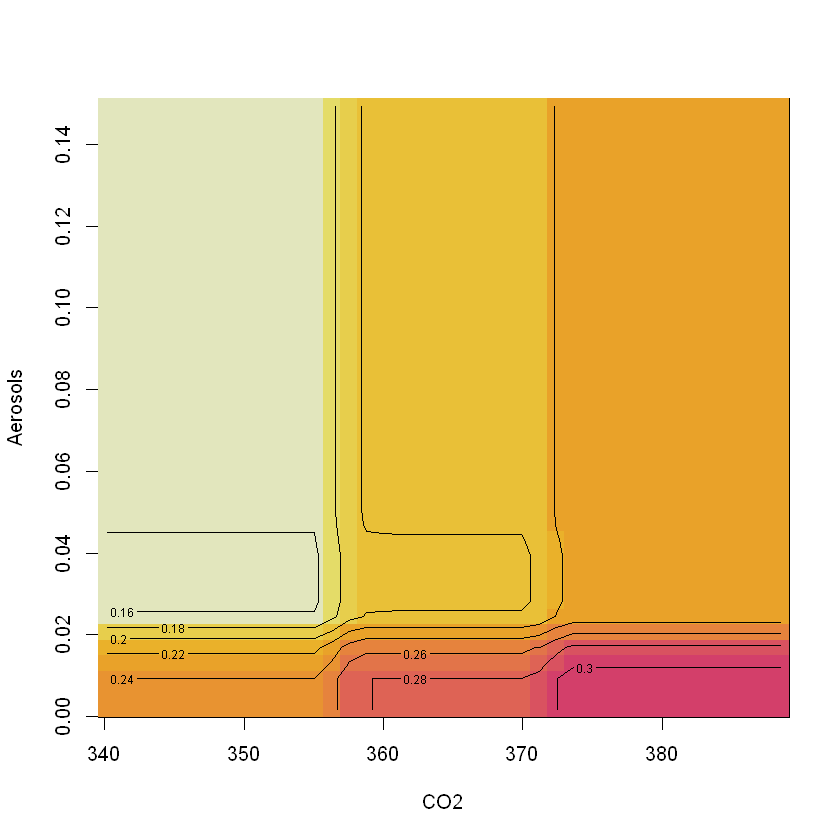

In [104]:
pairplot(airq.ens, varnames = c("CO2", "Aerosols"))

NOTE: function pairplot uses package 'akima', which has an ACM license. See also https://www.acm.org/publications/policies/software-copyright-notice.


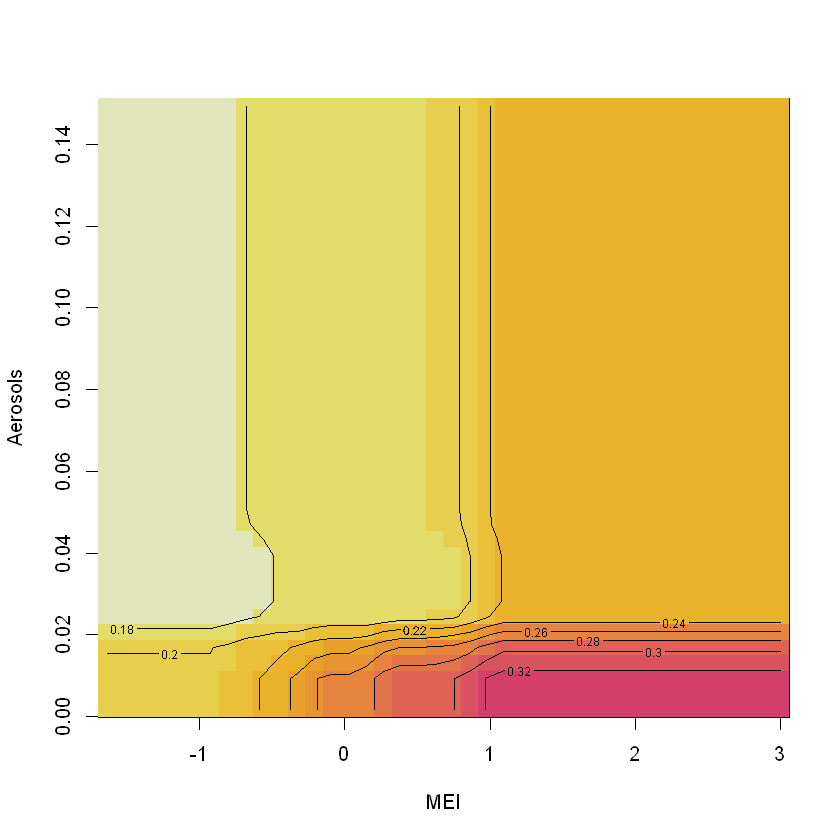

In [105]:
pairplot(airq.ens, varnames = c("MEI", "Aerosols"))

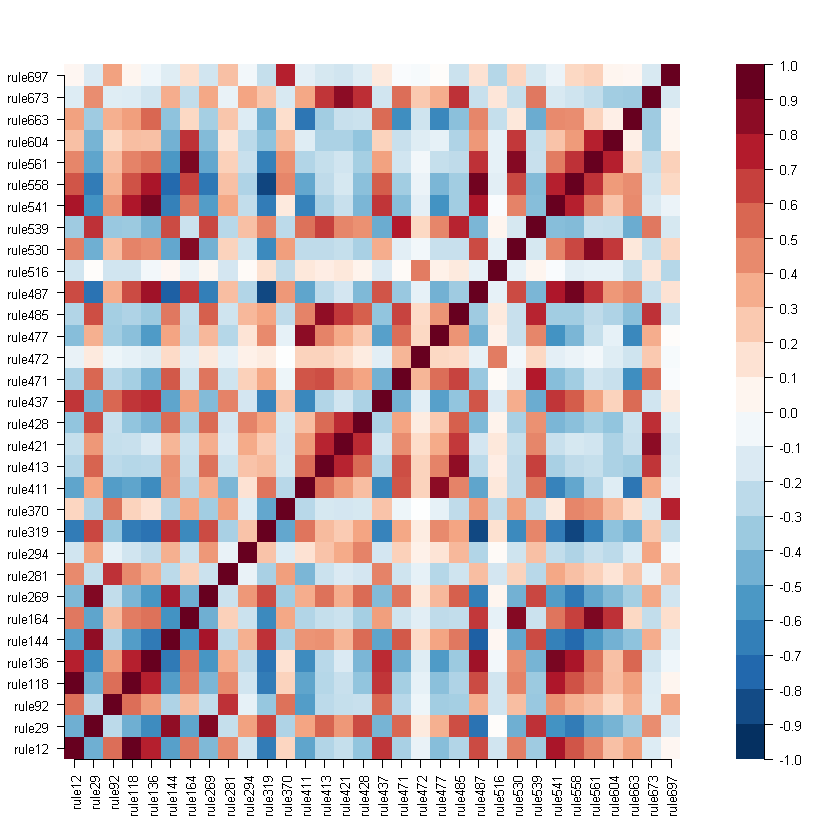

In [108]:
corplot(airq.ens)